# Clustering

Voy a utilizar R para aplicar el algoritmo PAM.

La matriz de distancias se importan del preprocesamiento anterior en python. 

El objetivo es optimizar los conjutnos de clusters obteniendo la menor cantidad de clusters con un silhouette positivo en todos los elementos.

In [1]:
library(cluster)
library(ggplot2)
#library(factoextra)
#http://www.sthda.com/english/articles/27-partitioning-clustering-essentials/
#http://www.sthda.com/english/articles/29-cluster-validation-essentials/96-determining-the-optimal-number-of-clusters-3-must-know-methods/
#https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

#http://www.sthda.com/english/articles/29-cluster-validation-essentials/97-cluster-validation-statistics-must-know-methods/

In [2]:
d1 <- matrix(scan("C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\matriz_dist_d1.csv", sep = ','),
               nrow=731,
               byrow=TRUE)
d2 <- matrix(scan("C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\matriz_dist_d2.csv", sep = ','),
               nrow=731,
               byrow=TRUE)

In [84]:
num_clusters <- c()
v_shares <- c()
v_avg_sil <- c()
v_min_clus_sil <- c()
v_per_sil_pos <- c()

start <- Sys.time()

for (share in c(0.25, 0.5, 0.75)) {

    dist_compound <- as.dist(d1 * share + d2 * (1-share))
    
    for (cluster in (c(2:70)))  {
       
           
        pam_obj <- pam(dist_compound, k = cluster, diss = TRUE)
         
        v_min_clus_sil <- c( v_min_clus_sil, min(summary(pam_obj)$sil$clus.avg.widths))
        v_avg_sil <- c(v_avg_sil, summary(pam_obj)$sil$avg.width)
        v_per_sil_pos <- c( v_per_sil_pos, sum(summary(pam_obj)$sil$widths[,3]>0)/731)
        
        num_clusters <- c(num_clusters, cluster)   
        v_shares <- c(v_shares, share) 
       
        
   } 
}

Sys.time() - start

Time difference of 12.64332 mins

In [85]:
output_sil <- cbind(v_shares, num_clusters, v_avg_sil, v_min_clus_sil,v_per_sil_pos)
output_sil <- as.data.frame(output_sil)
colnames(output_sil) <- c("Peso.Distancias","Numero.Clusters"
                          , "Silhouette.Medio", "Min.Silhouette.Cluster.Medio"
                          , "Observaciones.Silhouette.Positivo")

head(output_sil)
write.csv(output_sil, file = "C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\output_silhouette_ite6.csv",row.names=FALSE)

Peso.Distancias,Numero.Clusters,Silhouette.Medio,Min.Silhouette.Cluster.Medio,Observaciones.Silhouette.Positivo
0.25,2,0.22333147,-0.091523900,0.8057456
0.25,3,0.03068593,-0.078721610,0.5841313
0.25,4,0.10474638,0.060914113,0.8180575
0.25,5,0.09854697,0.079942719,0.7592339
0.25,6,0.06871950,0.023019262,0.6525308
0.25,7,0.06726053,-0.004989865,0.6251710


In [3]:
output_sil <- read.csv(file = "C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\output_silhouette_ite6.csv")

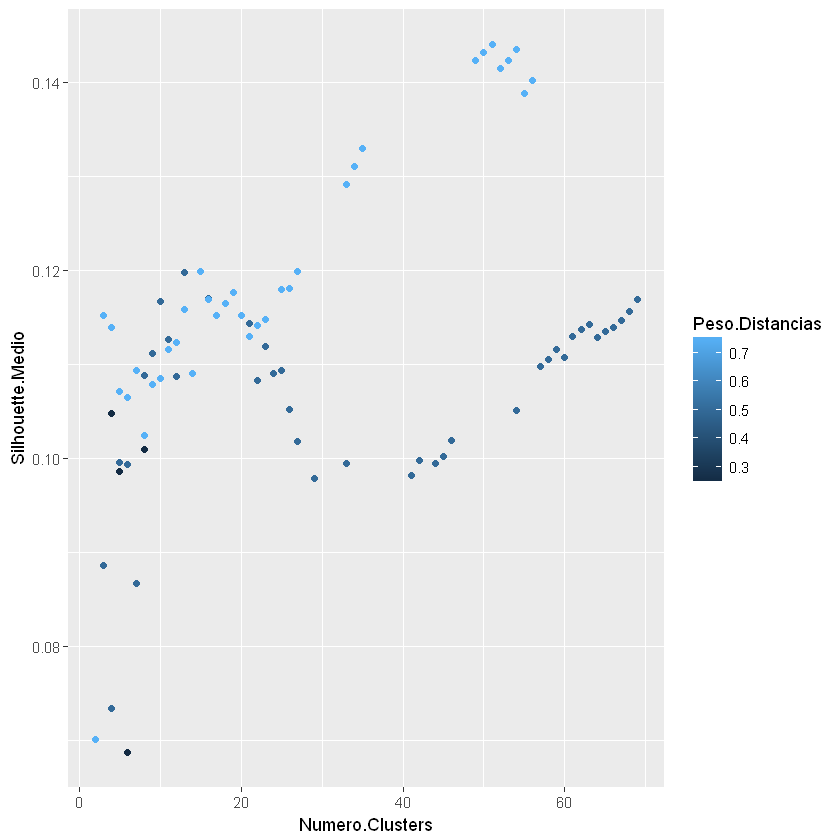

In [93]:
ggplot(subset(output_sil, Min.Silhouette.Cluster.Medio > 0)
       , aes(x = Numero.Clusters, y = Silhouette.Medio 
             , color = Peso.Distancias)) + geom_point()

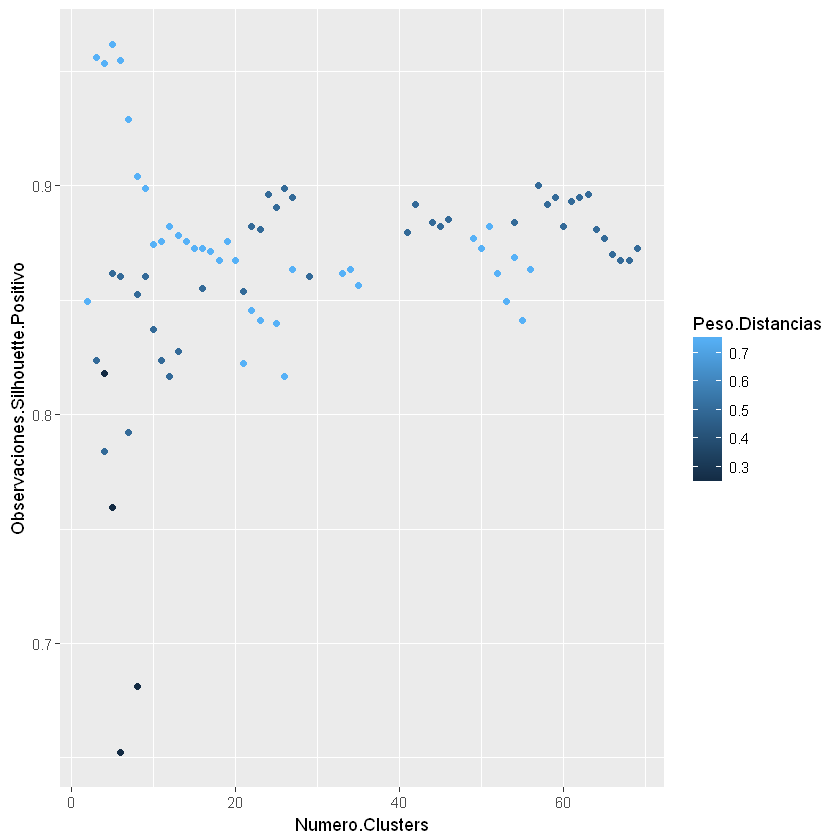

In [94]:
ggplot(subset(output_sil, Min.Silhouette.Cluster.Medio > 0)
       , aes(x = Numero.Clusters, y = Observaciones.Silhouette.Positivo 
             , color = Peso.Distancias)) + geom_point()

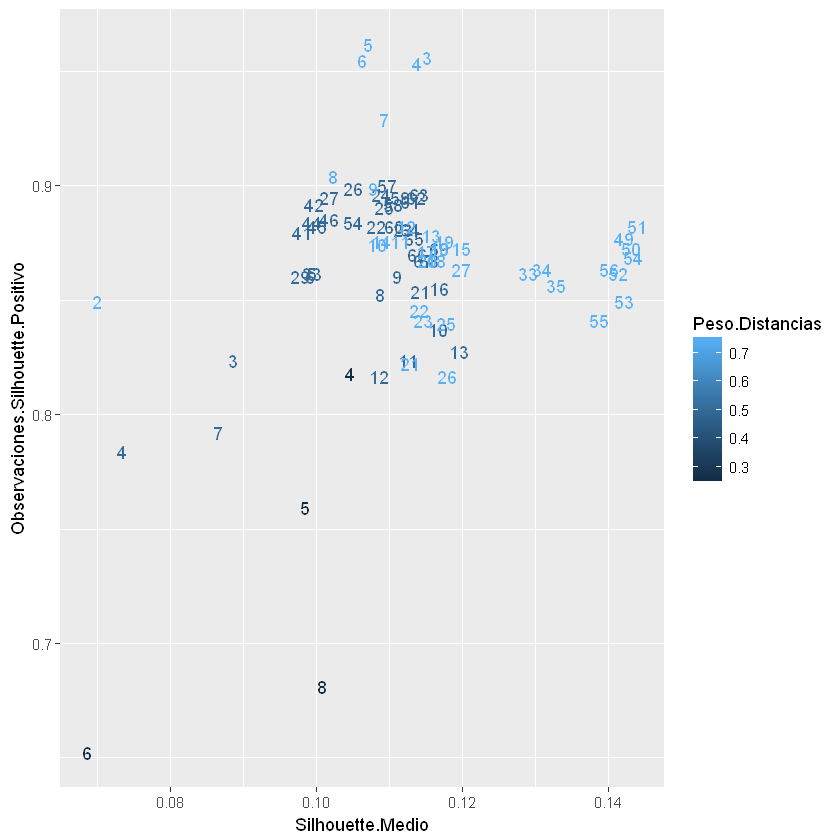

In [98]:
ggplot(subset(output_sil, Min.Silhouette.Cluster.Medio > 0)
       , aes(x = Silhouette.Medio, y = Observaciones.Silhouette.Positivo 
             , color = Peso.Distancias)) + geom_text(aes(label = Numero.Clusters))

In [112]:
pam_win <- pam(as.dist(d1*0.75 + d2*0.25 ), k = 3, diss = TRUE)

In [113]:
pam_win$medoids

[1]  19 605 323

19: [1,3] = [view_listings y app_open] 
605: [1, 4, 5, 10] = [view_listings, search_complete, browse_subcategory_select, chat_inbox]
323: [1, 2, 6, 16] = [view_listings, view_item, login_show, login_sign_in_start]

314: [1, 2, 6, 7] = [view_listings, view_item, login_show, view_profile]
123: [1,2,16] = [view_listings, view_item, login_sign_in_start]

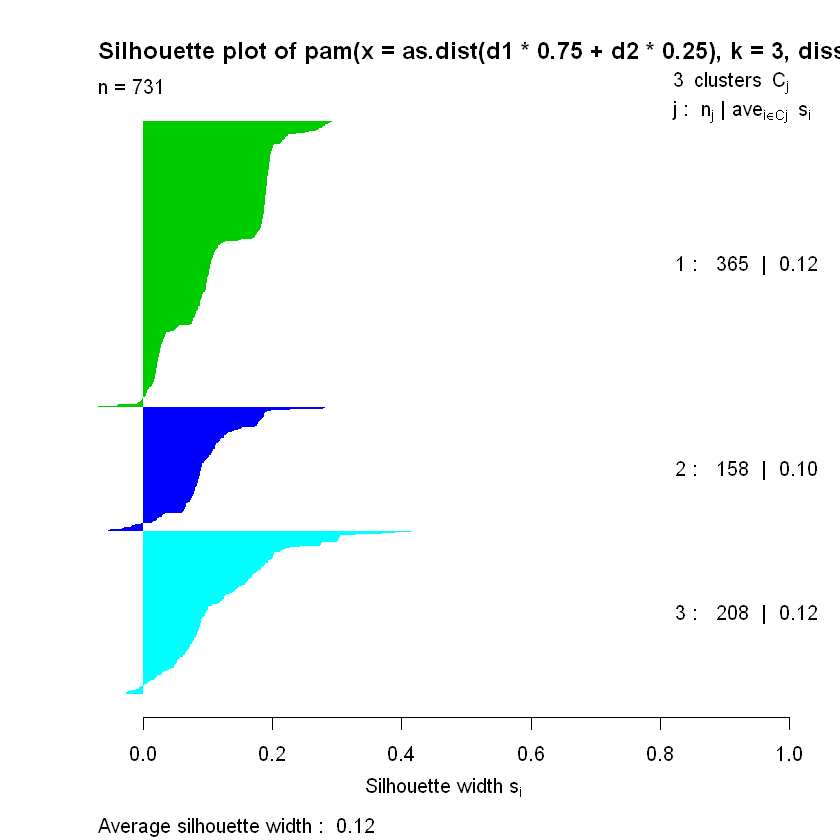

In [100]:
plot(silhouette(pam_win), col=3:5, border=NA)

In [109]:
write.table(pam_win$clustering
            , file = "C:\\Users\\OLX - Gonzalo\\Desktop\\tesis\\clustering_vector.csv"
            , col.names = FALSE
            , sep = ',')